## Adjacency Matrix Export

In this notebook we will export the adjacency matrix of 100 vascular tumors with blood vessel networks of increasing average degree centrality. 

The resulting .csv files for networks will be used to compute network metrics, to examine how such graph properties relate to prognosis for (1) tumor growth and (2) cancer treatment outcome.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import sys
from BloodVesselGraph import AutomatonToGraph
from TumorAngiogenesisSynchro import Tissue
from TumorAngiogenesisSynchro import CellType
from BloodVesselGraph import SearchType


### Blood vessel network exports

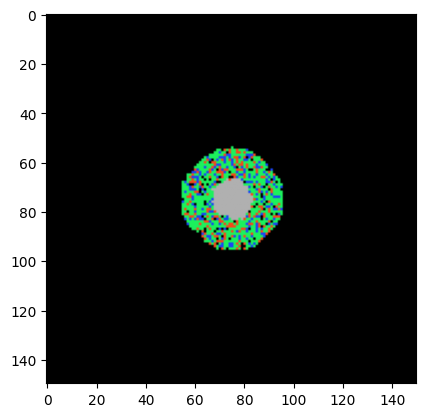

In [2]:
#Open the tumor instance
automatonHeight = 150
automatonWidth = 150
tumor = Tissue(automatonHeight, automatonWidth)
tumor = tumor.importTumorInstance("avascular_instance.pkl")

plt.figure()
plt.imshow(tumor.getPicture(True))

In [3]:
nNetworks = 100
#We vary the eta parameter of the angiogenesis model to obtain blood vessel networks with distinct
#average centrality degrees

etaValues = np.linspace(0,0.035,nNetworks)
#etaValues = np.linspace(0,0.1,nNetworks)
networkSteps = 200
automatonToGraph = AutomatonToGraph()
automatonToGraph.differenceRadius = 0
averageDegreeValues = []
averageDegree = 0
for i in range(0,len(etaValues)):
    print(i)
    print(etaValues[0:i])
    print(averageDegreeValues)
    eta = etaValues[i]
    tumor.setVascularPhase()
    tumor.angiogenesisModule.eta = eta
    tumor.continueTumorEvolution(networkSteps, True, True, True, True)
    tumor.exportTumorInstance("Bloodvessel_objects/tumor_"+str(i)+".pkl")
    print("Exported instance")
    proliferatingLocations= tumor.getProliferatingLocations()
    occupiedCells = tumor.angiogenesisModule.occupiedCells
    angioNet = automatonToGraph.convertAutomatonToGraphWithTumor(occupiedCells, proliferatingLocations, 2000, SearchType.BFS)
    angioNet.exportAdjacencyTable("Adjacency_Matrices/network_"+str(i)+".csv")
    averageDegree = angioNet.getAverageDegree()
    averageDegreeValues.append(averageDegree)
    tumor = Tissue(automatonHeight, automatonWidth)
    tumor = tumor.importTumorInstance("avascular_instance.pkl")
    clear_output(wait = True)
    

99
[0.         0.00035354 0.00070707 0.00106061 0.00141414 0.00176768
 0.00212121 0.00247475 0.00282828 0.00318182 0.00353535 0.00388889
 0.00424242 0.00459596 0.00494949 0.00530303 0.00565657 0.0060101
 0.00636364 0.00671717 0.00707071 0.00742424 0.00777778 0.00813131
 0.00848485 0.00883838 0.00919192 0.00954545 0.00989899 0.01025253
 0.01060606 0.0109596  0.01131313 0.01166667 0.0120202  0.01237374
 0.01272727 0.01308081 0.01343434 0.01378788 0.01414141 0.01449495
 0.01484848 0.01520202 0.01555556 0.01590909 0.01626263 0.01661616
 0.0169697  0.01732323 0.01767677 0.0180303  0.01838384 0.01873737
 0.01909091 0.01944444 0.01979798 0.02015152 0.02050505 0.02085859
 0.02121212 0.02156566 0.02191919 0.02227273 0.02262626 0.0229798
 0.02333333 0.02368687 0.0240404  0.02439394 0.02474747 0.02510101
 0.02545455 0.02580808 0.02616162 0.02651515 0.02686869 0.02722222
 0.02757576 0.02792929 0.02828283 0.02863636 0.0289899  0.02934343
 0.02969697 0.03005051 0.03040404 0.03075758 0.03111111 0.031

100%|█████████████████████████████████████████| 200/200 [02:29<00:00,  1.33it/s]


Tumor object saved to Bloodvessel_objects/tumor_99.pkl
Exported instance


100%|█████████████████████████████████████| 1007/1007 [00:00<00:00, 1633.91it/s]


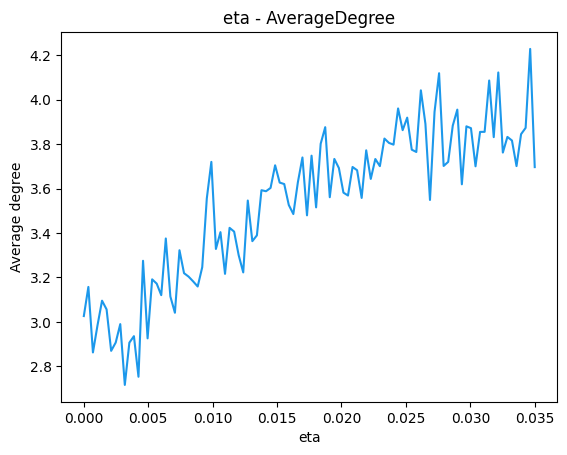

In [4]:
plt.figure()
plt.plot(etaValues, averageDegreeValues, color = "#1c98eb")
plt.xlabel("eta")
plt.ylabel("Average degree")
plt.title("eta - AverageDegree")
plt.savefig('Figures/network_eta_degrees.pdf', format='pdf', dpi=600, bbox_inches='tight')